## Observations and Insights 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df3= pd.merge(mouse_metadata,study_results)
# Display the data table for preview
df3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
# Checking the number of mice.
mice= df3["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [102]:
#Truncated info for Mouse ID column
df3.loc[:,"Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [103]:
 #Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
DMD= df3[df3.duplicated(['Mouse ID', 'Timepoint'])]
#DMD = Duplicate Mouse Data
DMD

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [104]:
# Optional: Get all the data for the duplicate mouse ID. 
DMD=df3[df3.duplicated(['Mouse ID',])]
DMD


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

klean_df = DMD.drop_duplicates("Mouse ID")
klean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
41,g791,Ramicane,Male,11,16,5,45.851531,0
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1874,z795,Naftisol,Female,13,29,5,46.833475,0


In [106]:
# Checking the number of mice in the clean DataFrame.
len(klean_df)

237

### Check if Clean and free of erroneous information
klean_df.count()


In [107]:
 #Summary Statistics
regimen_mean = klean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = klean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = klean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = klean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = klean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem 


Drug Regimen
Capomulin    0.448593
Ceftamin     0.164505
Infubinol    0.477067
Ketapril     0.264819
Naftisol     0.202385
Placebo      0.218091
Propriva     0.248545
Ramicane     0.482955
Stelasyn     0.254830
Zoniferol    0.188950
Name: Tumor Volume (mm3), dtype: float64

In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: _group_by = klean_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
sumstats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
sumstats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593
Ceftamin,46.503051,46.370798,0.568299,0.753856,0.164505
Infubinol,46.541247,46.870483,5.689821,2.385335,0.477067
Ketapril,47.389175,47.059664,1.612964,1.270025,0.264819
Naftisol,46.796098,46.621301,0.942076,0.970606,0.202385
Placebo,47.125589,46.989764,1.141526,1.068422,0.218091
Propriva,47.077791,46.847642,1.482589,1.217616,0.248545
Ramicane,43.944859,45.521875,5.831150,2.414777,0.482955
Stelasyn,47.470830,47.054185,1.493585,1.222123,0.254830


In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#Groupby drug regimen with .count and mouse id to determine the datapoints
Drugreg_data_points = klean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
Drugreg_data_points

Drug Regimen
Capomulin    25
Ceftamin     21
Infubinol    25
Ketapril     23
Naftisol     23
Placebo      24
Propriva     24
Ramicane     25
Stelasyn     23
Zoniferol    24
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

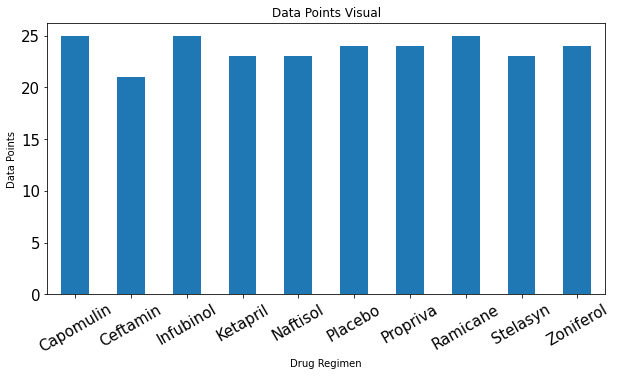

<Figure size 432x288 with 0 Axes>

In [140]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drugreg_data_points.plot(kind="bar",figsize=(10,5),fontsize = 15)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks (rotation=30)

#Alter the dataframe down to two columns
plt.show()
plt.tight_layout()

In [142]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Medication_list = summary_df.index.tolist()
Medication_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

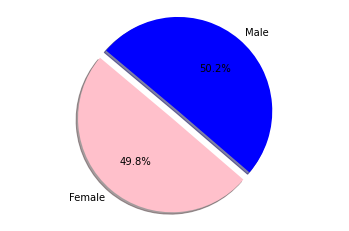

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

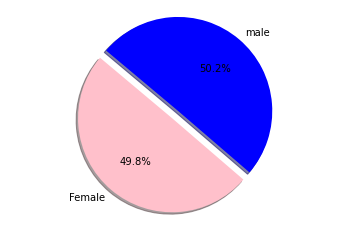

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_regimes = klean_df[klean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatment_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
treatment_regimes

treatment_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

treatment_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1,Ramicane,k403,5,38.825898
1114,Ceftamin,l490,5,45.612539
1104,Ceftamin,l471,5,46.251872
1070,Infubinol,k804,5,48.266204
1045,Infubinol,k483,5,46.611056
...,...,...,...,...
264,Ramicane,d251,5,41.746355
256,Ramicane,q610,5,45.629494
246,Ramicane,i334,5,41.020518
1847,Ceftamin,y865,5,46.735006


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
